## Imports

In [ ]:
import warnings
 
warnings.simplefilter('ignore')
 
import pandas as pd
 
import numpy as np
 
import matplotlib.pyplot as plt
 
import seaborn as sns
 
from sklearn.metrics import r2_score
 
from sklearn.metrics import mean_absolute_error
 
from sklearn.metrics import mean_squared_error
 
from sklearn.model_selection import train_test_split
 
from sklearn.ensemble import RandomForestRegressor
 
from sklearn.linear_model import LinearRegression
 
from sklearn.ensemble import GradientBoostingRegressor
 
from sklearn.ensemble import ExtraTreesRegressor
 
from sklearn.linear_model import BayesianRidge
 
from sklearn.svm import SVR
 
from xgboost import XGBRegressor
 
from sklearn.multioutput import MultiOutputRegressor
 
from sklearn.tree import DecisionTreeRegressor
 
from sklearn.neighbors import KNeighborsRegressor
 
from sklearn.cluster import KMeans
 
from sklearn.preprocessing import LabelEncoder
 
from sklearn.experimental import enable_iterative_imputer
 
from sklearn.impute import IterativeImputer
 
from sklearn.feature_selection import SelectKBest
 
from sklearn.feature_selection import f_regression

## Data Preprocessing

In [ ]:
df = pd.read_excel('Master data file.xlsx' , sheet_name = 'Data', header = 3)
 
df.drop(df.columns[0], axis = 1, inplace = True)
 
df = df.iloc[:-1]

In [ ]:
df

,S.No,Farmer ID,Village,Seed type,Month of sowing,Acres cultivated,Seed Used (kilos),Pesticides used (kilos),Fungicides (kilos),Herbicides (kilos),Fertilizers used (kilos),Gross cob quantity (kilos),Yield/acre \n(Col M/Col G) (kilos),Yield/seed used \n(Col M/ Col H) (kilos)
0,1.0,FID1001,Chekkapalli,GP206,October,0.8,4.5,1.082,0.81,1.5,652.6,2815,3518.750000,625.555556
1,2.0,FID1003,Chekkapalli,GP208,November,2.0,15.3,0.264,1.12,3.0,705.0,9475,4737.500000,619.281046
2,3.0,FID1004,Chekkapalli,GP208,November,1.4,11.8,0.464,0.82,3.5,502.5,6980,4985.714286,591.525424
3,4.0,FID1005,Chekkapalli,GP208,November,3.2,23.4,0.696,1.80,4.5,782.7,13425,4195.312500,573.717949
4,5.0,FID1006,Chekkapalli,GP208,November,1.7,13.0,0.564,1.12,4.0,1005.0,6950,4088.235294,534.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,956.0,FID3156,Polavaram,GP803,December,2.0,11.6,0.064,0.00,4.0,200.0,4990,2495.000000,430.172414
956,957.0,FID3157,Polavaram,GP803,December,1.0,5.8,0.232,0.29,2.0,550.0,1330,1330.000000,229.310345
957,958.0,FID3160,Polavaram,GP208,December,1.0,7.8,0.000,0.00,0.0,0.0,2630,2630.000000,337.179487
958,959.0,FID3189,Polavaram,GP803,January,0.8,4.3,0.730,0.87,0.0,0.0,1690,2112.500000,393.023256


In [ ]:
df['Yield/acre \n(Col M/Col G) (kilos)'].fillna(0, inplace = True)

df['Yield/seed used \n(Col M/ Col H) (kilos)'].fillna(0.0 , inplace  = True)

df = df.rename(columns={"Yield/acre \n(Col M/Col G) (kilos)": "Yield per Acre (kilos)" , "Yield/seed used \n(Col M/ Col H) (kilos)" : "Yield per Seed (kilos)"})

df.isnull().sum()

S.No                          0
Farmer ID                     0
Village                       0
Seed type                     0
Month of sowing               0
Acres cultivated              0
Seed Used (kilos)             0
Pesticides used (kilos)       0
Fungicides (kilos)            0
Herbicides (kilos)            0
Fertilizers used (kilos)      0
Gross cob quantity (kilos)    0
Yield per Acre (kilos)        0
Yield per Seed (kilos)        0
dtype: int64

In [ ]:
df = df.replace(0 , np.nan)

data_label_encoder = LabelEncoder()

encoded_list = data_label_encoder.fit_transform(df['Farmer ID'])

df['EncodedFarmerID'] = encoded_list

encoded_list = data_label_encoder.fit_transform(df['Village'])

df['EncodedVillage'] = encoded_list

encoded_list = data_label_encoder.fit_transform(df['Seed type'])

df['EncodedSeedType'] = encoded_list

encoded_list = data_label_encoder.fit_transform(df['Month of sowing'])

df['EncodedMonth'] = encoded_list

df = df.drop(['Farmer ID','Village','Seed type','Month of sowing'] , axis = 1)

df = df[['S.No','EncodedFarmerID','EncodedVillage','EncodedSeedType','EncodedMonth','Acres cultivated','Seed Used (kilos)','Pesticides used (kilos)','Fungicides (kilos)','Herbicides (kilos)','Fertilizers used (kilos)','Gross cob quantity (kilos)','Yield per Acre (kilos)','Yield per Seed (kilos)']]

df

,S.No,EncodedFarmerID,EncodedVillage,EncodedSeedType,EncodedMonth,Acres cultivated,Seed Used (kilos),Pesticides used (kilos),Fungicides (kilos),Herbicides (kilos),Fertilizers used (kilos),Gross cob quantity (kilos),Yield per Acre (kilos),Yield per Seed (kilos)
0,1.0,212,0,1,3,0.8,4.5,1.082,0.81,1.5,652.6,2815,3518.750000,625.555556
1,2.0,213,0,2,2,2.0,15.3,0.264,1.12,3.0,705.0,9475,4737.500000,619.281046
2,3.0,214,0,2,2,1.4,11.8,0.464,0.82,3.5,502.5,6980,4985.714286,591.525424
3,4.0,215,0,2,2,3.2,23.4,0.696,1.80,4.5,782.7,13425,4195.312500,573.717949
4,5.0,216,0,2,2,1.7,13.0,0.564,1.12,4.0,1005.0,6950,4088.235294,534.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,956.0,794,8,6,0,2.0,11.6,0.064,NaN,4.0,200.0,4990,2495.000000,430.172414
956,957.0,795,8,6,0,1.0,5.8,0.232,0.29,2.0,550.0,1330,1330.000000,229.310345
957,958.0,797,8,2,0,1.0,7.8,NaN,NaN,NaN,NaN,2630,2630.000000,337.179487
958,959.0,820,8,6,1,0.8,4.3,0.730,0.87,NaN,NaN,1690,2112.500000,393.023256


## Iterative Imputer

In [ ]:
def iterative_imputer(df , est = BayesianRidge()) :
  
  X = df.drop(['S.No' , 'EncodedFarmerID'] , axis = 1)
  
  imp = IterativeImputer(missing_values = np.nan , max_iter = 10 , min_value = 0)

  imp.fit(X)

  IterativeImputer()

  X = imp.transform(X)

  dataframe = pd.DataFrame(X , columns = df.drop(['S.No' , 'EncodedFarmerID'] , axis = 1).columns)

  dataframe.insert(0 , 'S.No' , df['S.No'])

  dataframe.insert(1 , 'EncodedFarmerID' , df['EncodedFarmerID'])

  return dataframe

## Regression Functions

In [ ]:
def error_rate(y_test , y_pred , algo = ' Linear Regression') :

  print(algo + '\n')
  
  print(" Mean Absolute Error : ", round(mean_absolute_error(y_test, y_pred) , 3))  

  print(" Mean Squared Error : ", round(mean_squared_error(y_test, y_pred) , 3))  

  print(" Root Mean Squared Error : ", round(np.sqrt(mean_squared_error(y_test, y_pred)) , 3))

  print(" R2 Score : ", round(r2_score(y_test,y_pred) , 3))

  print('\n')

In [ ]:
def regression_module(X_train, y_train, X_test, y_test) :
  
  reg = LinearRegression()

  reg.fit(X_train , y_train)

  y_pred = reg.predict(X_test)

  error_rate(y_test , y_pred)

  del reg , y_pred


  reg = RandomForestRegressor()

  reg.fit(X_train , y_train)

  y_pred = reg.predict(X_test)

  error_rate(y_test , y_pred , ' Random Forest Regression')

  del reg , y_pred



  reg = GradientBoostingRegressor()

  reggb = MultiOutputRegressor(reg, n_jobs=-1)
  
  reggb.fit(X_train , y_train)

  y_pred = reggb.predict(X_test)

  error_rate(y_test , y_pred , ' Gradient Boosting Regression')

  del reg , y_pred , reggb


  reg = ExtraTreesRegressor()

  reg.fit(X_train , y_train)

  y_pred = reg.predict(X_test)

  error_rate(y_test , y_pred , ' Extra Trees Regressor')

  del reg , y_pred


  reg = XGBRegressor(objective = 'reg:squarederror')

  regxgb = MultiOutputRegressor(reg, n_jobs=-1)
  
  regxgb.fit(X_train , y_train)

  y_pred = regxgb.predict(X_test)

  error_rate(y_test , y_pred , ' XGBoost Regressor')

  del reg , y_pred , regxgb


  reg  = SVR()

  regsvr = MultiOutputRegressor(reg, n_jobs = -1)

  regsvr.fit(X_train,y_train)

  y_pred  = regsvr.predict(X_test)

  error_rate(y_test , y_pred , 'LinearSVR Regression')

  del reg , y_pred , regsvr

## Selecting Top 5 Features Considering Yield per Acre (kilos) as Output Variable

In [ ]:
def top_5_features_variable1(dataframe) :

  print(' Top 5 Features With Yield per Acre (kilos) as Output Variable \n')
  
  X = dataframe.drop(['S.No', 'EncodedFarmerID','Gross cob quantity (kilos)' , 'Yield per Acre (kilos)','Yield per Seed (kilos)'] , axis = 1)

  y = dataframe[['Yield per Acre (kilos)']]
  
  select_k_best = SelectKBest(f_regression , k = 5)

  k_best = select_k_best.fit(X , y)

  data = pd.DataFrame(dict(Features = X.columns , Importance = select_k_best.scores_)).sort_values('Importance', ascending = False).head(5)

  return data

## Selecting Top 5 Features Considering Yield per Seed (kilos) as Output Variable

In [ ]:
def top_5_features_variable2(dataframe) :

  print(' Top 5 Features With Yield per Seed (kilos) as Output Variable \n')
  
  X = dataframe.drop(['S.No', 'EncodedFarmerID','Gross cob quantity (kilos)' , 'Yield per Acre (kilos)','Yield per Seed (kilos)'], axis = 1)

  y = dataframe[['Yield per Seed (kilos)']]
  
  select_k_best = SelectKBest(f_regression , k = 5)

  k_best = select_k_best.fit(X , y)

  data = pd.DataFrame(dict(Features = X.columns , Importance = select_k_best.scores_)).sort_values('Importance', ascending = False).head(5)

  return data

## Selecting Top 5 Features Considering Gross cob quantity (kilos) as the Output Variable

In [ ]:
def top_5_features_variable3(dataframe) :

  print(' Top 5 Features With Gross cob quantity (kilos) as Output Variable \n')
  
  X = dataframe.drop(['S.No', 'EncodedFarmerID','Gross cob quantity (kilos)' , 'Yield per Acre (kilos)','Yield per Seed (kilos)'], axis = 1)

  y = dataframe[['Gross cob quantity (kilos)']]
  
  select_k_best = SelectKBest(f_regression , k = 5)

  k_best = select_k_best.fit(X , y)

  data = pd.DataFrame(dict(Features = X.columns , Importance = select_k_best.scores_)).sort_values('Importance', ascending = False).head(5)

  return data

## Selecting Features for all the three Output Variables in Descending Order


In [ ]:
def top_features(dataframe) :
  
  d = {}

  X = dataframe.drop(['S.No', 'EncodedFarmerID','Gross cob quantity (kilos)' , 'Yield per Acre (kilos)','Yield per Seed (kilos)'] , axis = 1)

  y = dataframe[['Gross cob quantity (kilos)' , 'Yield per Acre (kilos)','Yield per Seed (kilos)']]
  
  for i in X.columns :

    x = X.drop([i], axis=1)

    X_train , X_test , y_train , y_test = train_test_split(x , y , test_size = 0.15)

    reg = GradientBoostingRegressor()

    reggb = MultiOutputRegressor(reg, n_jobs = -1)

    reggb.fit(X_train,y_train)

    y_pred = reggb.predict(X_test)

    d[i] = r2_score(y_test, y_pred)

    del reg , reggb ,  y_pred , x, X_train , X_test , y_train , y_test

  d = {k: v for k, v in sorted(d.items(), key=lambda x: x[1])}

  print(' Most to least important ')

  print('\n')

  count = 1
  
  for i in d.keys() :

    print(' ' + str(count) + '. ' + i)

    count = count + 1

    print('\n')

## Iterative Imputer With Bayesian Ridge

In [ ]:
dataframe = iterative_imputer(df)

X = dataframe.drop(['S.No', 'EncodedFarmerID','Gross cob quantity (kilos)' , 'Yield per Acre (kilos)','Yield per Seed (kilos)'] , axis = 1)

y = dataframe[['Gross cob quantity (kilos)' , 'Yield per Acre (kilos)','Yield per Seed (kilos)']]

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.15)

regression_module(X_train , y_train , X_test , y_test)

 Linear Regression

 Mean Absolute Error :  713.149
 Mean Squared Error :  1386928.737
 Root Mean Squared Error :  1177.679
 R2 Score :  0.47


 Random Forest Regression

 Mean Absolute Error :  670.975
 Mean Squared Error :  1593588.862
 Root Mean Squared Error :  1262.374
 R2 Score :  0.588


 Gradient Boosting Regression

 Mean Absolute Error :  631.799
 Mean Squared Error :  1622011.214
 Root Mean Squared Error :  1273.582
 R2 Score :  0.65


 Extra Trees Regressor

 Mean Absolute Error :  598.111
 Mean Squared Error :  1382676.247
 Root Mean Squared Error :  1175.873
 R2 Score :  0.635


 XGBoost Regressor

 Mean Absolute Error :  636.593
 Mean Squared Error :  1468176.23
 Root Mean Squared Error :  1211.683
 R2 Score :  0.653


LinearSVR Regression

 Mean Absolute Error :  1370.229
 Mean Squared Error :  8130552.11
 Root Mean Squared Error :  2851.412
 R2 Score :  -0.027




#####  Least RMSE Value and High R2 Score for Gradient Boosting Regressor

## Selecting Top Features

#### For the Output Variable Yield per Acre (kilos)

In [ ]:
dataframe = iterative_imputer(df)

top_5_features_variable1(dataframe)

 Top 5 Features With Yield per Acre (kilos) as Output Variable 



,Features,Importance
2,EncodedMonth,218.056662
1,EncodedSeedType,18.813511
0,EncodedVillage,14.568921
5,Pesticides used (kilos),13.284093
6,Fungicides (kilos),3.601434


#### For the Output Variable Yield per Seed (kilos)

In [ ]:
dataframe = iterative_imputer(df)

top_5_features_variable2(dataframe)

 Top 5 Features With Yield per Seed (kilos) as Output Variable 



,Features,Importance
2,EncodedMonth,207.989285
5,Pesticides used (kilos),29.744753
8,Fertilizers used (kilos),19.935524
7,Herbicides (kilos),12.350891
3,Acres cultivated,12.193935


#### For The Output Variable Gross cob quantity (kilos)

In [ ]:
dataframe = iterative_imputer(df)

top_5_features_variable3(dataframe)

 Top 5 Features With Gross cob quantity (kilos) as Output Variable 



,Features,Importance
3,Acres cultivated,7548.562719
4,Seed Used (kilos),4121.146037
7,Herbicides (kilos),2733.122170
8,Fertilizers used (kilos),1246.494268
5,Pesticides used (kilos),1041.213936


#### For all three Output Variables

In [ ]:
dataframe = iterative_imputer(df)

top_features(dataframe)

 Most to least important 


 1. EncodedMonth


 2. Seed Used (kilos)


 3. EncodedSeedType


 4. EncodedVillage


 5. Acres cultivated


 6. Fungicides (kilos)


 7. Herbicides (kilos)


 8. Fertilizers used (kilos)


 9. Pesticides used (kilos)




## Pearson Distribution

In [ ]:
gaussian_data = iterative_imputer(df)

gaussian_data = gaussian_data.drop(['S.No' , 'EncodedFarmerID' , 'EncodedVillage' , 'EncodedSeedType' , 'EncodedMonth'] , axis = 1)

gaussian_data.insert(0, 'Pesticides (kilos) per Acre', gaussian_data['Pesticides used (kilos)'] / gaussian_data['Acres cultivated'])

gaussian_data.insert(1 ,'Fungicides (kilos) per Acre' , gaussian_data['Fungicides (kilos)'] / gaussian_data['Acres cultivated'])

gaussian_data.insert(2 ,'Herbicides (kilos) per Acre' , gaussian_data['Herbicides (kilos)'] / gaussian_data['Acres cultivated'])

gaussian_data.insert(3 ,'Fertilizers (kilos) per Acre' , gaussian_data['Fertilizers used (kilos)'] / gaussian_data['Acres cultivated'])

gaussian_data.insert(4 ,'Pesticides (kilos) per Seeds (kilos)' , gaussian_data['Pesticides used (kilos)'] / gaussian_data['Seed Used (kilos)'])

gaussian_data.insert(5 ,'Fungicides (kilos) per Seeds (kilos)' , gaussian_data['Fungicides (kilos)'] / gaussian_data['Seed Used (kilos)'])

gaussian_data.insert(6 ,'Herbicides (kilos) per Seeds (kilos)' , gaussian_data['Herbicides (kilos)'] / gaussian_data['Seed Used (kilos)'])

gaussian_data.insert(7 , 'Fertilizers (kilos) per Seeds (kilos)' , gaussian_data['Fertilizers used (kilos)'] / gaussian_data['Seed Used (kilos)'])

gaussian_data = gaussian_data.drop(['Acres cultivated' , 'Seed Used (kilos)' , 'Pesticides used (kilos)' ,'Fungicides (kilos)' ,'Herbicides (kilos)' , 'Fertilizers used (kilos)' , 'Gross cob quantity (kilos)'] , axis = 1)

gaussian_data

,Pesticides (kilos) per Acre,Fungicides (kilos) per Acre,Herbicides (kilos) per Acre,Fertilizers (kilos) per Acre,Pesticides (kilos) per Seeds (kilos),Fungicides (kilos) per Seeds (kilos),Herbicides (kilos) per Seeds (kilos),Fertilizers (kilos) per Seeds (kilos),Yield per Acre (kilos),Yield per Seed (kilos)
0,1.352500,1.012500,1.875000,815.750000,0.240444,0.180000,0.333333,145.022222,3518.750000,625.555556
1,0.132000,0.560000,1.500000,352.500000,0.017255,0.073203,0.196078,46.078431,4737.500000,619.281046
2,0.331429,0.585714,2.500000,358.928571,0.039322,0.069492,0.296610,42.584746,4985.714286,591.525424
3,0.217500,0.562500,1.406250,244.593750,0.029744,0.076923,0.192308,33.448718,4195.312500,573.717949
4,0.331765,0.658824,2.352941,591.176471,0.043385,0.086154,0.307692,77.307692,4088.235294,534.615385
...,...,...,...,...,...,...,...,...,...,...
955,0.032000,0.000000,2.000000,100.000000,0.005517,0.000000,0.344828,17.241379,2495.000000,430.172414
956,0.232000,0.290000,2.000000,550.000000,0.040000,0.050000,0.344828,94.827586,1330.000000,229.310345
957,0.617370,0.000000,1.832905,276.944017,0.079150,0.000000,0.234988,35.505643,2630.000000,337.179487
958,0.912500,1.087500,3.476855,460.643158,0.169767,0.202326,0.646857,85.701053,2112.500000,393.023256


#### Plotting Histograms wrt input variables to verify that the data has a Gaussian Distribution

In [ ]:
def plot_histogram_input(dataframe) :

  X = dataframe.drop(['Yield per Acre (kilos)','Yield per Seed (kilos)'] , axis = 1)

  for i in range(len(X.columns)) :

    plt.figure(i)

    plt.hist(X[X.columns[i]])

    plt.title(X.columns[i], color = 'black')

  plt.show()

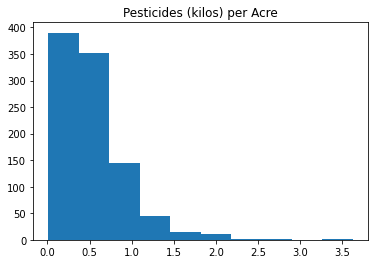

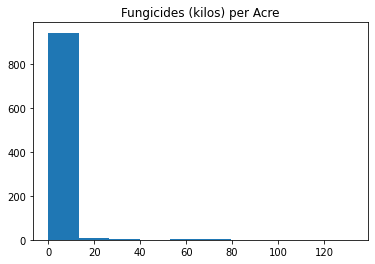

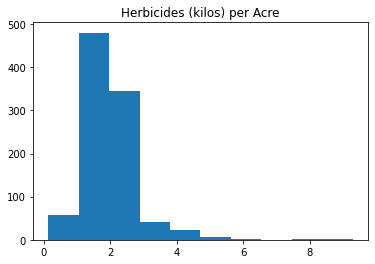

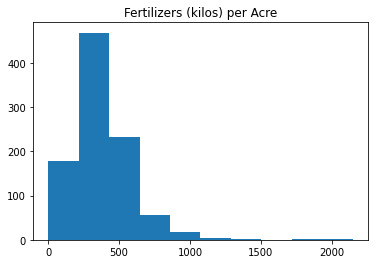

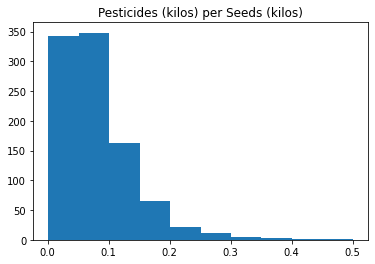

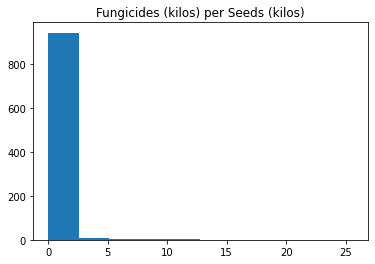

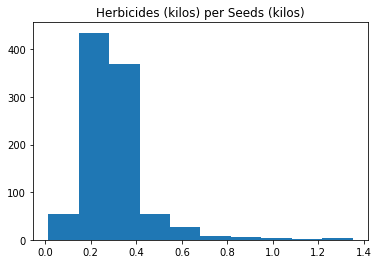

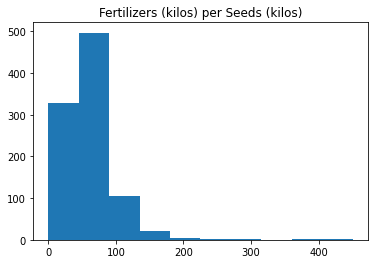

In [ ]:
plot_histogram_input(gaussian_data)

#### Plotting Histograms wrt output variables to verify that the data has a Gaussian Distribution

In [ ]:
def plot_histogram_output(dataframe) :

  y = dataframe[['Yield per Acre (kilos)','Yield per Seed (kilos)']]

  for i in range(len(y.columns)) :

    plt.figure(i)

    plt.hist(y[y.columns[i]])

    plt.title(y.columns[i], color = 'black')

  plt.show()

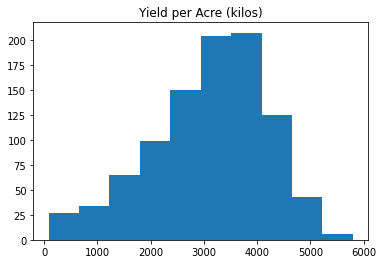

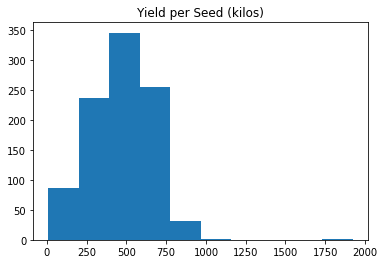

In [ ]:
plot_histogram_output(gaussian_data)

#### Plotting Graphs to verify that the data is not linearly distributed

In [ ]:
def plot_data(dataframe) :
  
  X = dataframe.drop(['Yield per Acre (kilos)','Yield per Seed (kilos)'] , axis = 1)
  
  y = dataframe[['Yield per Acre (kilos)','Yield per Seed (kilos)']]
  
  for i in X.columns :
 
    plt.figure(i)
 
    x = np.array(X[i])
 
    y1 = np.array(y['Yield per Acre (kilos)'])
 
    plt.plot(x, y1, 'o')
 
    m, b = np.polyfit(x, y1, 1)
 
    plt.plot(x, m*x + b)
 
    plt.title(i, color = 'black')
 
plt.show()

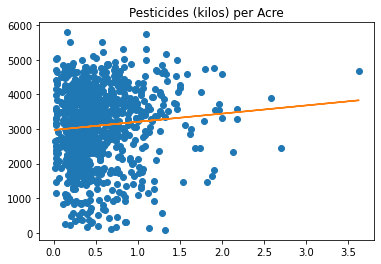

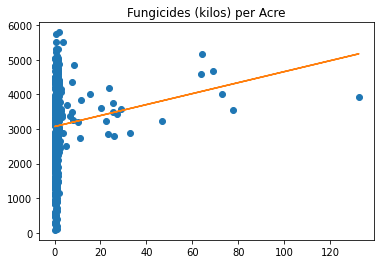

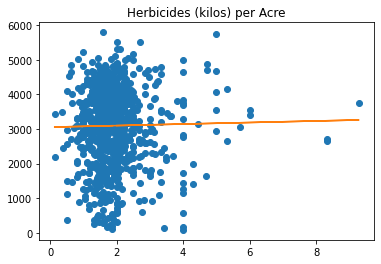

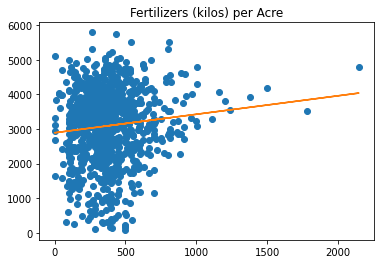

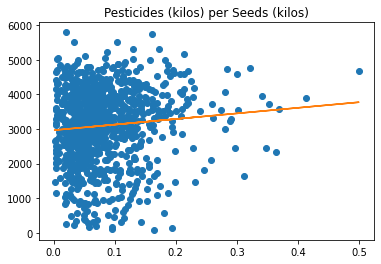

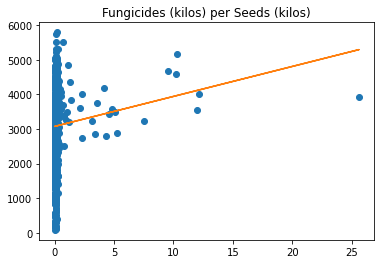

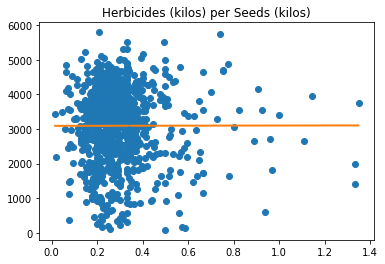

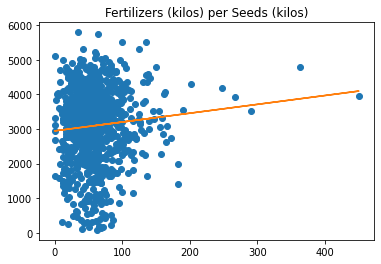

In [ ]:
plot_data(gaussian_data)

#### Correlation Heatmap

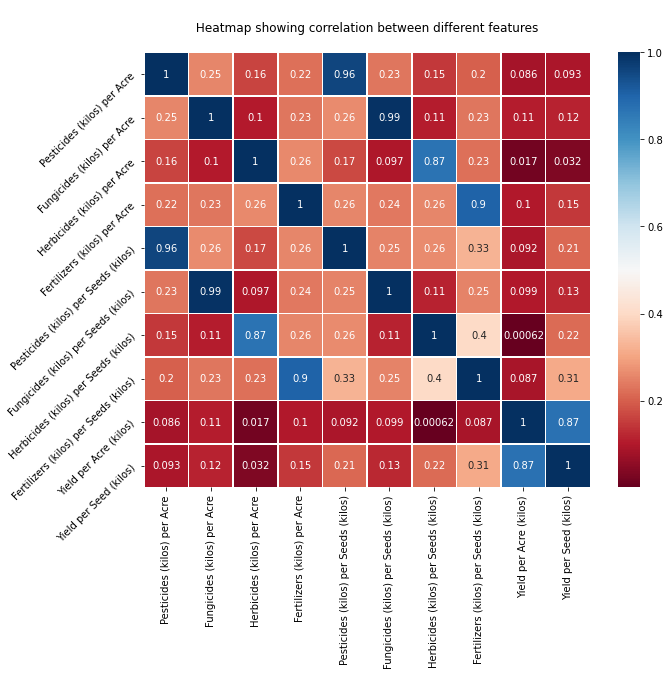

In [ ]:
plt.figure(figsize = (10, 8))

plt.title('\n Heatmap showing correlation between different features \n')

sns.heatmap(gaussian_data.corr(method = 'pearson'), xticklabels = gaussian_data.columns , yticklabels = gaussian_data.columns , annot = True, cmap = 'RdBu', linewidths = 0.5)

plt.yticks(rotation = 45) 

plt.show()

## Feature Importance Graph

## Resuts

* When using Iterative Imputer the best fit is obtained when using the Bayesian Ridge Regressor
* Data is not linearly distributed which is evident from the graphs plotted above
* The model follows Gradient Boosting Regression as it has least RMSE Value and High R2 Score
* The Top 5 Features along with their scores for the output variable Yield / Acre (kilos)
  * Month	218.056662
  * Seed Type	18.813511
  * Village	14.568921
  * Pesticides used (kilos)	13.284093
  * Fungicides (kilos)	3.601434
* The Top 5 Features along with their for the output variable Yield / Seed (kilos)
  * Month	207.989285
  * Pesticides used (kilos)	29.744753
  * Fertilizers used (kilos)	19.935524
  * Herbicides (kilos)	12.350891
  * Acres cultivated	12.193935

* The Top 5 Features for the output variable Gross cob quantity (kilos)
  * Acres cultivated	7548.562719
  * Seed Used (kilos)	4121.146037
  * Herbicides (kilos)	2733.122170
  * Fertilizers used (kilos)	1246.494268
  * Pesticides used (kilos)	1041.213936
   
* Top 5 Features for all the three output variables 
  * Month
  * Seed Type
  * Seed Used (kilos)
  * Herbicides (kilos)
  * Acres cultivated

* After normalizing the distribution and finding the Pearson's coefficient
  * The output variable Yield per Acre (kilos) has a correlation with the input variables in the following order
      -  Fungicides (kilos) per Acre with a score of 0.11
      -  Fertilizers (kilos) per Acre with a score of 0.1
      -  Fungicides (kilos) per Seeds (kilos) with a score of 0.099
      -  Pesticides (kilos) per Seeds (kilos) with a score of 0.092
      -  Fertilizers (kilos) per Seeds (kilos) with a score of 0.087
      -  Pesticides (kilos) per Acre with a score of 0.086
      -  Herbicides (kilos) per Acre with a score of 0.017
      -  Herbicicdes (kilos) per Seeds (kilos) with a score 0.00062
  * The output variable Yield per Seeds (kilos) has a correlation with the input variables in the following order
      -  Fertilizers (kilos) per Seeds (kilos) with a score of 0.31
      -  Herbicicdes (kilos) per Seeds (kilos) with a score 0.22
      -  Pesticides (kilos) per Seeds (kilos) with a score of 0.21
      -  Fertilizers (kilos) per Acre with a score of 0.15
      -  Fungicides (kilos) per Seeds (kilos) with a score of 0.13
      -  Fungicides (kilos) per Acre with a score of 0.12
      -  Pesticides (kilos) per Acre with a score of 0.093
      -  Herbicides (kilos) per Acre with a score of 0.032
